Davies-Bouldin Index: 0.7941771310476196
Silhouette Score: 0.46439920805375523


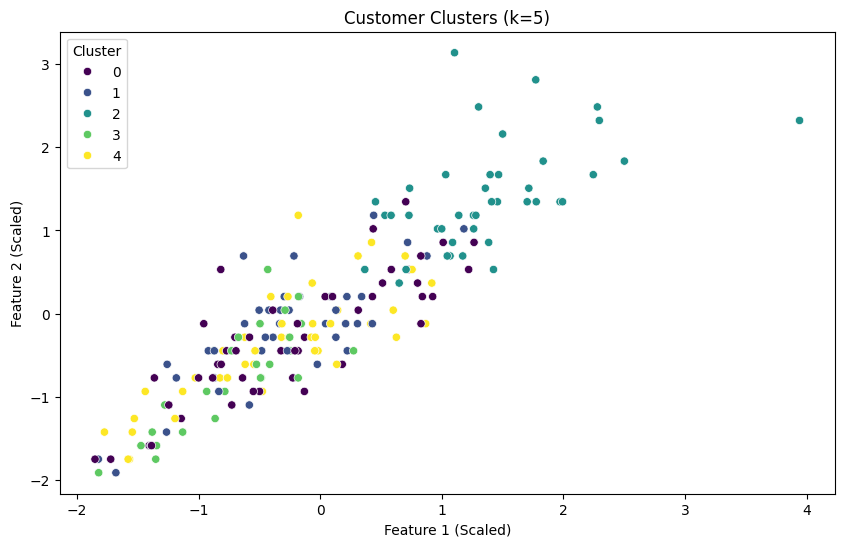

C:\Users\shrasti\AppData\Local\Temp\ipykernel_21052\2029164677.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cluster', data=customer_summary, palette='viridis')


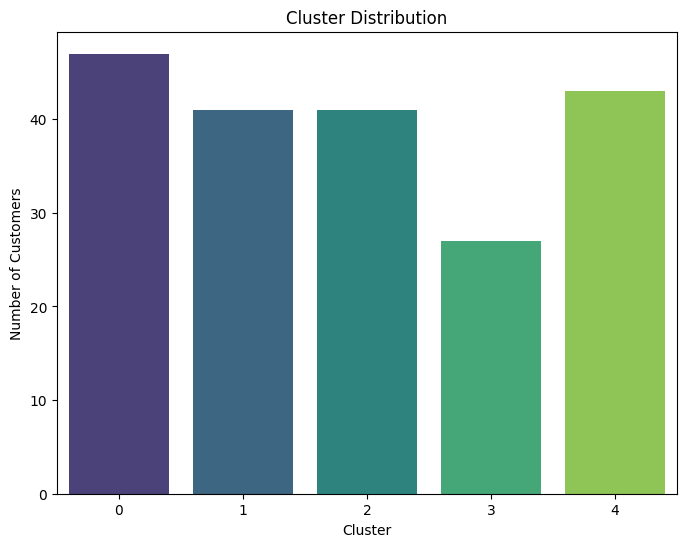

  CustomerID  Cluster
0      C0001        4
1      C0002        3
2      C0003        4
3      C0004        2
4      C0005        3
5      C0006        4
6      C0007        3
7      C0008        1
8      C0009        0
9      C0010        0


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score, silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
customers = pd.read_csv('Customers.csv')
transactions = pd.read_csv('Transactions.csv')

# Merge datasets to combine customer profiles with transaction data
merged_data = transactions.merge(customers, on='CustomerID', how='inner')

# Aggregate transaction data at the customer level
customer_summary = merged_data.groupby('CustomerID').agg({
    'TotalValue': 'sum',       # Total transaction value
    'Quantity': 'sum',         # Total products purchased
    'Region': 'first',         # Customer region
}).reset_index()

# One-hot encode the 'Region' column
customer_summary = pd.get_dummies(customer_summary, columns=['Region'], drop_first=True)

# Normalize the data (standardize numerical features)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_summary.drop(['CustomerID'], axis=1))

# Clustering using KMeans
n_clusters = 5  # You can experiment with values between 2 and 10
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
customer_summary['Cluster'] = kmeans.fit_predict(scaled_features)

# Calculate clustering metrics
db_index = davies_bouldin_score(scaled_features, customer_summary['Cluster'])
silhouette_avg = silhouette_score(scaled_features, customer_summary['Cluster'])
print(f"Davies-Bouldin Index: {db_index}")
print(f"Silhouette Score: {silhouette_avg}")

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=scaled_features[:, 0], 
    y=scaled_features[:, 1], 
    hue=customer_summary['Cluster'], 
    palette='viridis',
    legend='full'
)
plt.title(f'Customer Clusters (k={n_clusters})')
plt.xlabel('Feature 1 (Scaled)')
plt.ylabel('Feature 2 (Scaled)')
plt.legend(title='Cluster')
plt.show()

# Visualize cluster size
plt.figure(figsize=(8, 6))
sns.countplot(x='Cluster', data=customer_summary, palette='viridis')
plt.title('Cluster Distribution')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.show()

# Save the clustering results
customer_summary.to_csv('FirstName_LastName_Clustering.csv', index=False)

# Output sample clustering results
print(customer_summary[['CustomerID', 'Cluster']].head(10))
